In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
x=pd.read_csv("/content/drive/MyDrive/AIML Workshop/Bengaluru_House_Data.csv")

In [4]:
x

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [5]:
print(x.head())


              area_type   availability                  location       size  \
0  Super built-up  Area         19-Dec  Electronic City Phase II      2 BHK   
1            Plot  Area  Ready To Move          Chikka Tirupathi  4 Bedroom   
2        Built-up  Area  Ready To Move               Uttarahalli      3 BHK   
3  Super built-up  Area  Ready To Move        Lingadheeranahalli      3 BHK   
4  Super built-up  Area  Ready To Move                  Kothanur      2 BHK   

   society total_sqft  bath  balcony   price  
0  Coomee        1056   2.0      1.0   39.07  
1  Theanmp       2600   5.0      3.0  120.00  
2      NaN       1440   2.0      3.0   62.00  
3  Soiewre       1521   3.0      1.0   95.00  
4      NaN       1200   2.0      1.0   51.00  


In [6]:
print(x.shape)  # Rows and columns


(13320, 9)


In [7]:
print(x.info())
print(x.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB
None
area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64


In [8]:
# Extract the number of bedrooms (BHK) from the 'size' column and create a new column 'bhk'
x['bhk'] = x['size'].str.extract('(\d+)').astype(float)

# Drop the old 'size' column as it is now replaced by 'bhk'
x = x.drop(columns=['size'])

# Display the first few rows of the updated dataset
print(x.head())


              area_type   availability                  location  society  \
0  Super built-up  Area         19-Dec  Electronic City Phase II  Coomee    
1            Plot  Area  Ready To Move          Chikka Tirupathi  Theanmp   
2        Built-up  Area  Ready To Move               Uttarahalli      NaN   
3  Super built-up  Area  Ready To Move        Lingadheeranahalli  Soiewre   
4  Super built-up  Area  Ready To Move                  Kothanur      NaN   

  total_sqft  bath  balcony   price  bhk  
0       1056   2.0      1.0   39.07  2.0  
1       2600   5.0      3.0  120.00  4.0  
2       1440   2.0      3.0   62.00  3.0  
3       1521   3.0      1.0   95.00  3.0  
4       1200   2.0      1.0   51.00  2.0  


In [9]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   society       7818 non-null   object 
 4   total_sqft    13320 non-null  object 
 5   bath          13247 non-null  float64
 6   balcony       12711 non-null  float64
 7   price         13320 non-null  float64
 8   bhk           13304 non-null  float64
dtypes: float64(4), object(5)
memory usage: 936.7+ KB


In [10]:
x

,area_type,availability,location,society,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,19-Dec,Electronic City Phase II,Coomee,1056,2.0,1.0,39.07,2.0
1,Plot Area,Ready To Move,Chikka Tirupathi,Theanmp,2600,5.0,3.0,120.00,4.0
2,Built-up Area,Ready To Move,Uttarahalli,NaN,1440,2.0,3.0,62.00,3.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,Soiewre,1521,3.0,1.0,95.00,3.0
4,Super built-up Area,Ready To Move,Kothanur,NaN,1200,2.0,1.0,51.00,2.0
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,ArsiaEx,3453,4.0,0.0,231.00,5.0
13316,Super built-up Area,Ready To Move,Richards Town,NaN,3600,5.0,NaN,400.00,4.0
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,Mahla T,1141,2.0,1.0,60.00,2.0
13318,Super built-up Area,18-Jun,Padmanabhanagar,SollyCl,4689,4.0,1.0,488.00,4.0


In [11]:
# Drop rows with missing values
x = x.dropna()

# Verify missing values are handled
print(x.isnull().sum())


area_type       0
availability    0
location        0
society         0
total_sqft      0
bath            0
balcony         0
price           0
bhk             0
dtype: int64


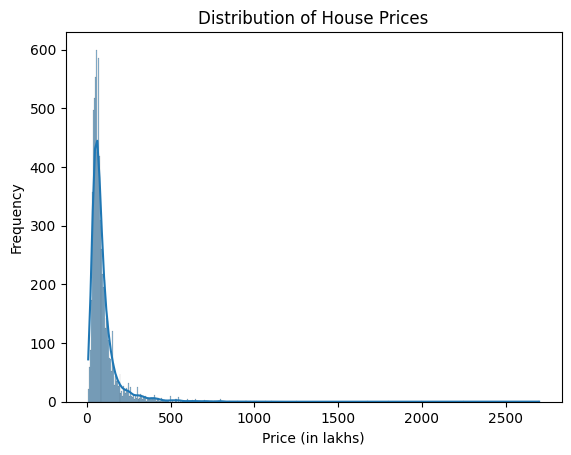

In [12]:
sns.histplot(x['price'], kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price (in lakhs)')
plt.ylabel('Frequency')
plt.show()


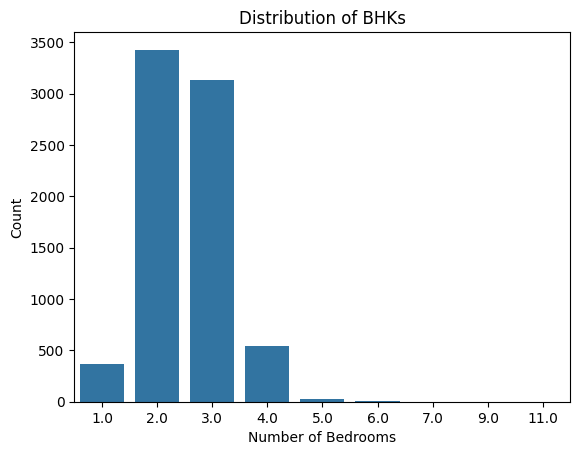

In [13]:
sns.countplot(x='bhk', data=x)
plt.title('Distribution of BHKs')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Count')
plt.show()


bhk
1.0      33.813829
2.0      59.406602
3.0     108.301145
4.0     289.357324
5.0     471.440000
6.0     353.666667
7.0     250.000000
9.0     210.000000
11.0    360.000000
Name: price, dtype: float64


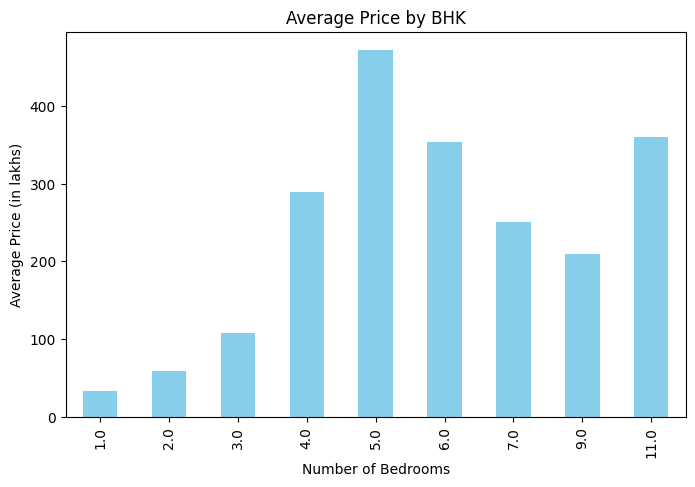

In [14]:
avg_price_by_bhk = x.groupby('bhk')['price'].mean()
print(avg_price_by_bhk)

avg_price_by_bhk.plot(kind='bar', color='skyblue', figsize=(8, 5))
plt.title('Average Price by BHK')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Average Price (in lakhs)')
plt.show()


#SUPERVISED LEARNING

In [15]:
# prompt: Explain Linear Regression

# Linear Regression Explanation

# Linear regression is a statistical method used to model the relationship between a dependent variable (target) and one or more independent variables (features).  It assumes a linear relationship, meaning the change in the target variable is proportional to the change in the predictor variables.

# In simpler terms, imagine you have data points scattered on a graph. Linear regression finds the best-fitting straight line through these points.  This line represents the predicted relationship between the variables.

# Key Concepts:

# 1. Dependent Variable (Target): The variable you're trying to predict (e.g., house price).
# 2. Independent Variable(s) (Features):  The variables used to predict the target (e.g., number of bedrooms, location, square footage).
# 3. Linear Equation: The equation of the best-fit line, typically represented as:
#    y = mx + c
#    where:
#       - y is the predicted value of the dependent variable
#       - x is the value of the independent variable
#       - m is the slope (representing the change in y for a unit change in x)
#       - c is the y-intercept (the value of y when x is 0)

# 4. Ordinary Least Squares (OLS): A common method for finding the best-fit line.  It aims to minimize the sum of the squared differences between the observed values and the predicted values (these differences are called residuals).

# 5. R-squared (Coefficient of Determination): A statistical measure that represents the proportion of variance in the dependent variable that is predictable from the independent variable(s).  A higher R-squared generally indicates a better fit.

# Example within the context of the provided code:

# You could use linear regression to predict house prices based on the number of bedrooms ('bhk').  The 'bhk' would be the independent variable (x), and the 'price' would be the dependent variable (y).  The model would try to find the line that best fits the relationship between these two variables.  You could then use this line to predict the price of a house with a given number of bedrooms.


# Applying Linear Regression in your code (example):

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Prepare the data
X = x[['bhk']] # Independent variable (features)
y = x['price'] # Dependent variable (target)


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


# The model's performance can be further improved by using additional features (e.g. location, area, etc).

Mean Squared Error: 8075.026617817833
R-squared: 0.2798723611693521
